<a href="https://colab.research.google.com/github/kanhgo/predictive_modeling/blob/main/Diabetes_predictor_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMPOWERING ACTION FOR BETTER HEALTH OUTCOMES

# Objective
To develop a predictive model to forecast the likelihood of diabetes diagnosis using demographic and behavioral risk factors from the CDCs BRFSS 2015 dataset.

## Importance

Diabetes is a significant public health concern in the United States, affecting millions of individuals across various demographics. By using predictive analytics and data-driven approaches, health planners can identify high-risk populations and allocate resources more effectively. For instance, models can guide the implementation of educational programs in schools to break the normalization of diabetes and its prevalence. Additionally, these models can help in planning initiatives to increase access to fresh food options in neighborhoods, thus promoting healthier lifestyles and potentially reducing the incidence of diabetes and improving health outcomes overall.

Althought this dataset and modeling exercise is US focused, it also provides a reference point for efforts in other geographical locations where diabetes prevelance is a concern. An understanding of cultural differences and practices can guide creation of an appropriate survey to curate and collect relevant data to support predictive modeling.

## About the dataset
- Data source: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset). This data subset was based on the CDC Behavioral Risk Factor Surveillance System (BRFSS)(2015) data found [here](https://www.cdc.gov/brfss/annual_data/annual_2015.html).
- Obtained clean and composed of 253,680 rows of survey responses, with 21 feature variables.
- The feature variables are predominantly categorical (including numeric ranges such as 5-year age ranges, or income ranges), with the classes represented by nominals e.g. 0, 1 (where the numbers are just labels and don't represent any order). BMI, number of days mental health not good (MentHlth), and number of days physical health not good (PhysHlth) are the continuous variables present.
- The target variable has three (3) classes which have also been represented by nominals: 0 - no diabetes or only gestational, 1 - prediabetes, 2 - diabetes.

## EXPLORATORY DATA ANALYSIS
Exploratory data analysis was an opportunity to
- gain a deeper understanding of the dataset,
- assess relationships between variables,
- make initial assessments about the suitability of variables for prediction
- and other considerations such as the need for scaling.

In [ ]:
# Required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loaded data
df = pd.read_csv('https://raw.githubusercontent.com/kanhgo/predictive_modeling/refs/heads/main/diabetes_012_health_indicators_BRFSS2015.csv')

In [ ]:
# Overview of data head and tail
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
# Verified the completeness of the dataset i.e. expected number of entries and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# Took a closer look at the continuous feature variables
df[['BMI', 'MentHlth', 'PhysHlth']].describe()

,BMI,MentHlth,PhysHlth
count,253680.000000,253680.000000,253680.000000
mean,28.382364,3.184772,4.242081
std,6.608694,7.412847,8.717951
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,98.000000,30.000000,30.000000


Text(0, 0.5, 'Frequency')

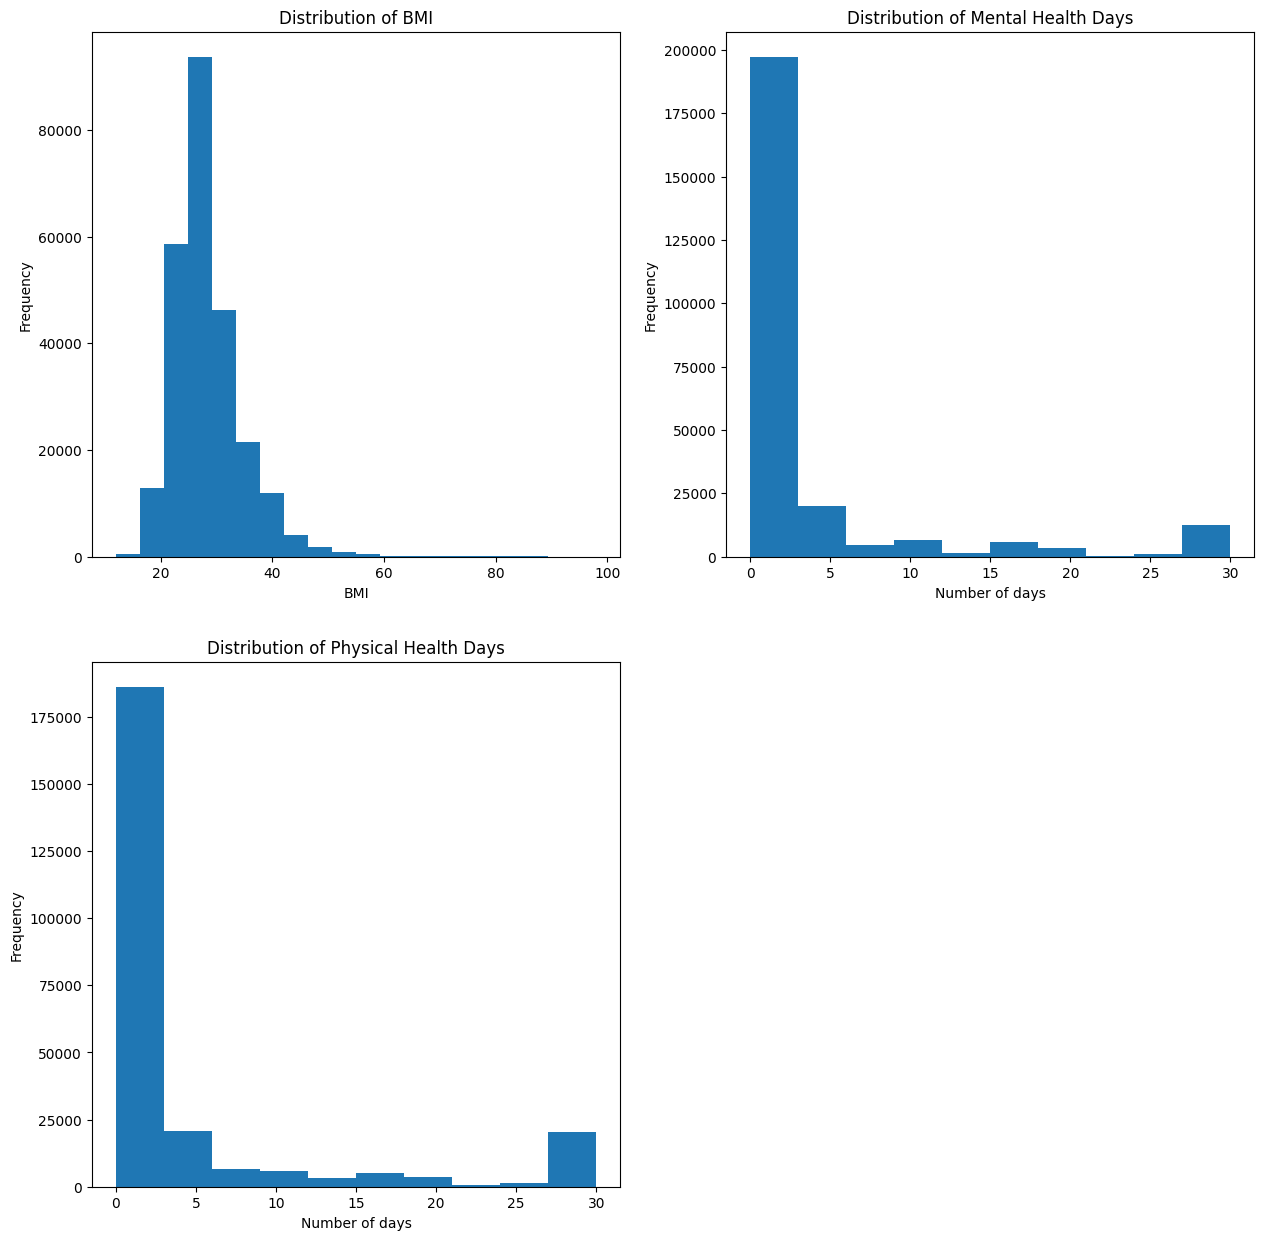

In [ ]:
# Visualized distribution of the continuous variables
fig = plt.figure(figsize=(15, 15))

ax1 = fig.add_subplot(2, 2, 1)
ax1.hist(df.BMI, bins=20)
ax1.set_title('Distribution of BMI')
ax1.set_xlabel('BMI')
ax1.set_ylabel('Frequency')

ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(df.MentHlth)
ax2.set_title('Distribution of Mental Health Days')
ax2.set_xlabel('Number of days')
ax2.set_ylabel('Frequency')

ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(df.PhysHlth)
ax3.set_title('Distribution of Physical Health Days')
ax3.set_xlabel('Number of days')
ax3.set_ylabel('Frequency')

These features did not appear to be normally distributed, with inidcations of being skewed to the right.

In [ ]:
# Corrected data types as necessary

df = df.astype('int')

df[['BMI', 'MentHlth', 'PhysHlth']]=df[['BMI', 'MentHlth', 'PhysHlth']].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  int64  
 1   HighBP                253680 non-null  int64  
 2   HighChol              253680 non-null  int64  
 3   CholCheck             253680 non-null  int64  
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  int64  
 6   Stroke                253680 non-null  int64  
 7   HeartDiseaseorAttack  253680 non-null  int64  
 8   PhysActivity          253680 non-null  int64  
 9   Fruits                253680 non-null  int64  
 10  Veggies               253680 non-null  int64  
 11  HvyAlcoholConsump     253680 non-null  int64  
 12  AnyHealthcare         253680 non-null  int64  
 13  NoDocbcCost           253680 non-null  int64  
 14  GenHlth               253680 non-null  int64  
 15  

### Separation of target and feature variables

In [ ]:
# Separated target and feature variables

y = df.Diabetes_012   # Diabetes health status; target variable
X = df.drop(columns='Diabetes_012', axis=1)   # feature variables

features = X.columns  # list of column names for the features

In [ ]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40.0,1,0,0,0,0,1,...,1,0,5,18.0,15.0,1,0,9,4,3
1,0,0,0,25.0,1,0,0,1,0,0,...,0,1,3,0.0,0.0,0,0,7,6,1
2,1,1,1,28.0,0,0,0,0,1,0,...,1,1,5,30.0,30.0,1,0,9,4,8
3,1,0,1,27.0,0,0,0,1,1,1,...,1,0,2,0.0,0.0,0,0,11,3,6
4,1,1,1,24.0,0,0,0,1,1,1,...,1,0,2,3.0,0.0,0,0,11,5,4


### Target Variable Distribution

In [ ]:
# Counts of the different diabetes health classes

print(df['Diabetes_012'].value_counts())

Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64


This significant imbalance in the classes for diabetes status can negatively impact the modeling process.
This was addressed by re-sampling prior to the modeling process.

### Pairwise Comparisons: To assess relationships between target and feature variables

In [ ]:
for column in X.columns:
    print(df.groupby(column)['Diabetes_012'].value_counts(normalize=True)) # normalize=True returns the value_counts as proportions

HighBP  Diabetes_012
0       0               0.927788
        2               0.060352
        1               0.011860
1       0               0.728776
        2               0.244457
        1               0.026767
Name: proportion, dtype: float64
HighChol  Diabetes_012
0         0               0.908166
          2               0.079814
          1               0.012020
1         0               0.753130
          2               0.220149
          1               0.026722
Name: proportion, dtype: float64
CholCheck  Diabetes_012
0          0               0.968004
           2               0.025449
           1               0.006547
1          0               0.837541
           2               0.143749
           1               0.018709
Name: proportion, dtype: float64
BMI   Diabetes_012
12.0  0               1.000000
13.0  0               0.857143
      2               0.095238
      1               0.047619
14.0  0               0.878049
                        ...   
95.0

The following presented minimal differences in proportions between diabetes diagnosis classes, suggesting that they may not be good predictors of diabetes diagnosis:
- smoker
- PhysActivity
- Fruits
- Veggies
- HvyAlcoholConsump
- AnyHealthCare
- NoDocbcCost
- Sex

The important indicator was how the proportions changed from one feature class to the next. For example, diabetics increased from 6% (no High BP class) to 24% (High BP class). This indicated that the High BP status may be a good predictor of diabetes status.

### Chi-Square Test of Independence: Further assessment of relationships between target and feature variables

In [ ]:
from scipy.stats import chi2_contingency

# List to store results
chi2_results = []

# Loop through each feature
for column in X.columns:
    # Create a contingency table using pd.crosstab
    contingency_table = pd.crosstab(X[column], df['Diabetes_012'])
    # Perform the chi-squared test using the chi2_contingency function
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Append results to the list
    chi2_results.append({
    'Feature':column,
    'Chi2':chi2,
    'p-value':p
    })

# Convert the list to a DataFrame
chi2_results = pd.DataFrame(chi2_results)

# Display the DataFrame
chi2_results.sort_values(by=['Chi2', 'p-value'], ascending=False)

,Feature,Chi2,p-value
13,GenHlth,24248.106147,0.000000e+00
0,HighBP,18794.644052,0.000000e+00
3,BMI,16040.937240,0.000000e+00
16,DiffWalk,12776.941889,0.000000e+00
1,HighChol,11258.920399,0.000000e+00
18,Age,9641.376531,0.000000e+00
15,PhysHlth,8669.662295,0.000000e+00
6,HeartDiseaseorAttack,8244.889107,0.000000e+00
20,Income,7816.462906,0.000000e+00
19,Education,4560.640279,0.000000e+00


The Chi2 statistic measures how the observed frequencies in each category differ from the expected frequencies, if the features were independent of the target variable.
- A higher value of the Chi2 statistic indicates a stronger association between the feature and the target variable.

The p-value indicates the probability that the observed association is due to chance.
A small p-value (typically < 0.05) indicates that the observed association is statistically significant.
- All features had extremely small p-values, indicating that the associations between these features and diabetes diagnosis are highly unlikely to be due to chance.
- However, features with higher Chi2 values (e.g., GenHlth, HighBP) had stronger associations with diabetes diagnosis compared to those with lower Chi2 values (e.g., AnyHealthcare, Sex).

These findings aligned with the observations from the pairwise comparison i.e. similar features are indicated to be weaker predictors of diabetes diagnosis.

### Mosaic Plots (for select categorical feature variables and the target variable)

<Figure size 1200x600 with 0 Axes>

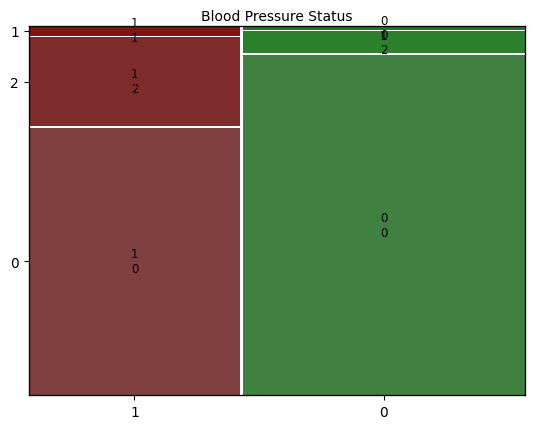

In [ ]:
!pip3 install statsmodels

from statsmodels.graphics.mosaicplot import mosaic

plt.figure(figsize=(12, 6))
mosaic(df, ['HighBP', 'Diabetes_012'])
plt.xlabel('Blood Pressure Status')
plt.show()


**Mosaic plots essentially visualize the observations from a pairwise comparison.**

With diabetes diagnosis as the veritcal or y-axis, there was shown to be a significant difference in the height (and area) of the diabetic segment (1,2) as you move from "high BP" on the left to "no high BP" on the right (0,2).

This supported the conclusion that this feature is potenitally a good predictor of diabetes diagnosis.

<Figure size 1200x600 with 0 Axes>

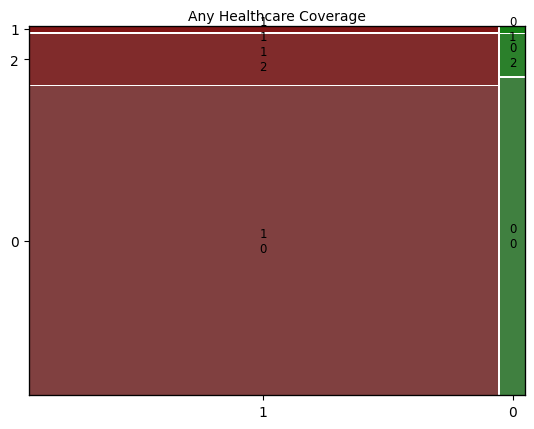

In [ ]:
plt.figure(figsize=(12, 6))
mosaic(df, ['AnyHealthcare', 'Diabetes_012'])
plt.xlabel('Any Healthcare Coverage')
plt.show()


The feature variable "AnyHealthcare" was identified, during pairwise comparison, as one of the weaker predictors of diabetes diagnosis.

No significant differences (in height) were observed between the "health coverage" group (1) on the left and the "no health coverage" group (0) on the right, across diabetes diagnosis classes. This supported this feature potentially being a weaker predictor of diabetes diagnosis.

### Collinearity Assessment (of the relationships between feature variables)
#### - Correlation Matrix Visualized With a Heatmap

Correlation between the feature variables was assessed via the creation of a correlation matirx which was then visualized with a heat map. This allowed for the determination of the extent of correlation, if any, by the size of the correlation coefficient and the color intensity of each square in the map.

<Axes: >

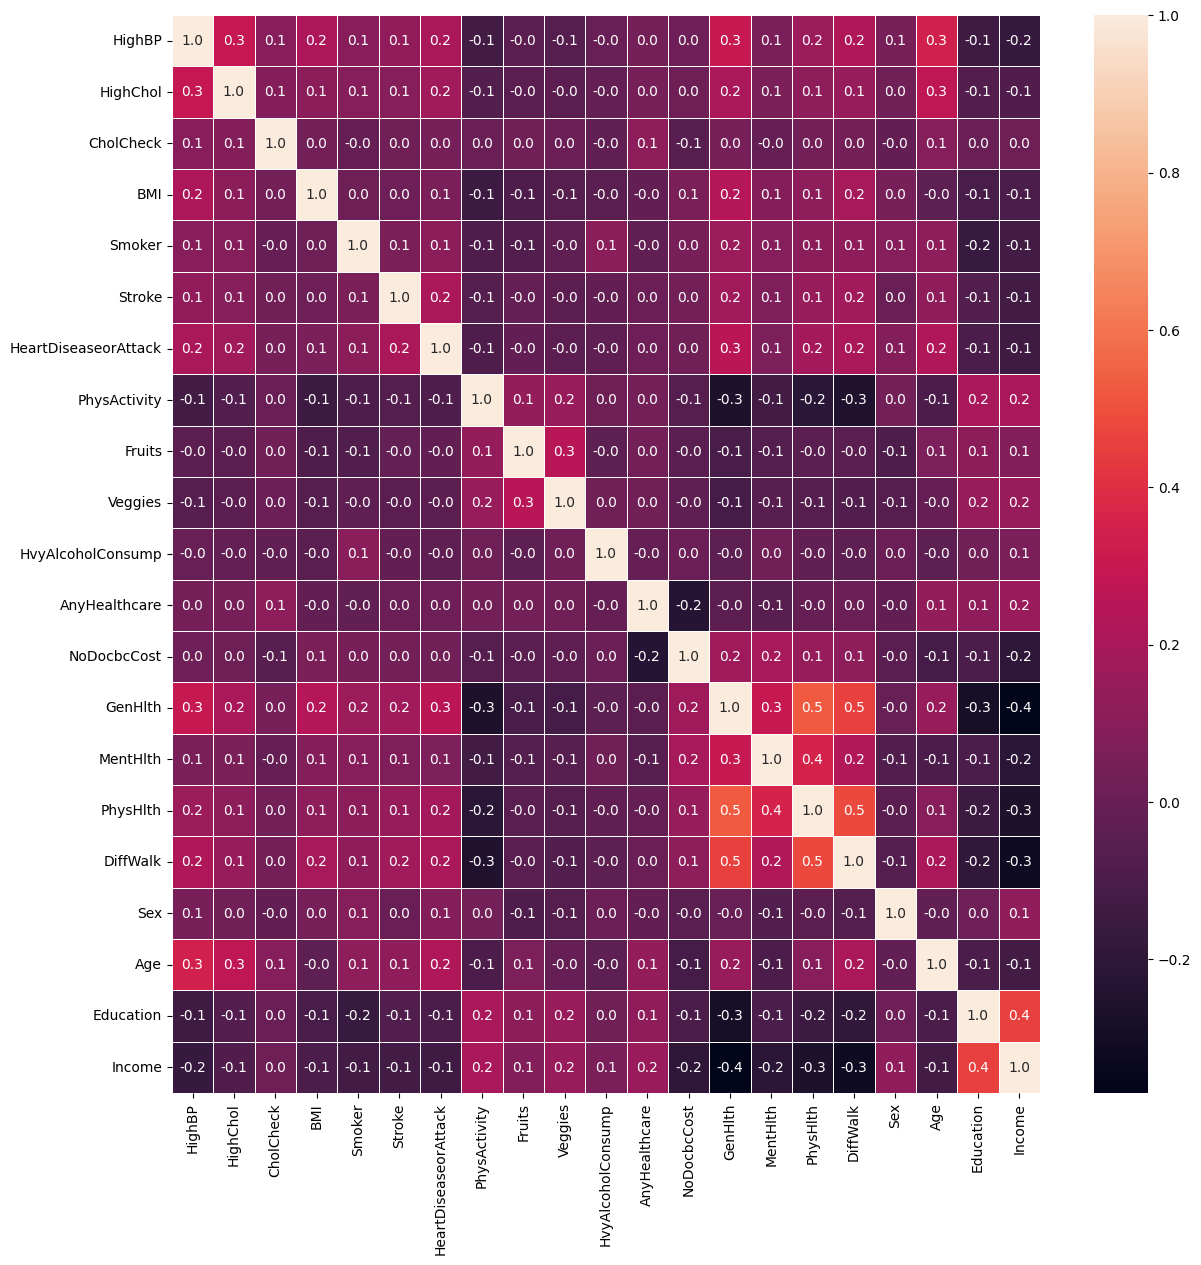

In [ ]:
# Creation of correlation matrix
correlation_matrix = X.corr()

# Creation of a heatmap
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, fmt='.1f', ax=ax)

Little or no collinearity was observed between the feature variables. The highest correlation coefficient observed was 0.5, between "general health" (GenGlth) and "physical health" (PhysHlth) as well as with "difficulty walking" (DiffWalk).

The absence of collinearity supported the use of a logistic model, as a starting point in the subsequent modeling exercise.

Collinearity refers to a situation in which two or more predictor variables in a regression model are highly correlated, meaning they have a strong linear relationship. High collinearity can cause problems in regression models, inclduing difficulty in determining the individual effect of each predictor.

## RE-SAMPLING TO ADDRESS CLASS IMBALANCE

Original count: class 0 (not diabetic) = 213703, class 1 (pre-diabetic) = 4631, class 2 (diabetic) = 35346

Two approaches were considered:

**A.** Random undersampling of the two majority classes (not diabetic and diabetic) to class 1 level (count of 4631), while maintaining the three classes.

**B.** Transformation of the data to two classes i.e. combination of "diabetic" and "pre-diabetic classes into class 1 (non-diabetic remaining as class 0) followed by random undersampling of the majority class (0) to the count level of the new minority class (1) i.e. 39977. Class 0 would represent an absence of the disease, while class 1 would indicate illness or risk of illness. (This was presented as a recommended approach in the documentation provided with the dataset, to aid model optimization.)

Random undersampling was chosen because:
- the orginal non-diabetic class was very large (>210,000) which facilitates true random sampling;
- a smaller sample (79,000+) size can lead to faster training times and less computational burden;
- it avoids overfitting which can occur if oversampling introduces duplicates;
- avoids the introduction of noise from the generation of synthetic samples.

The two re-sampled datasets were then made available for the feature and model selection exercises.


### Random Undersampling using RandomUnderSampler - A

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(f"Original class distribution: {Counter(y)}")

# Initialize the undersampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Fit and resample the data
X_resampled, y_resampled = rus.fit_resample(X, y)

print(f"Resampled class distribution: {Counter(y_resampled)}")
print(f"Resampled total size: {pd.DataFrame(y_resampled).shape[0]}")

Original class distribution: Counter({0: 213703, 2: 35346, 1: 4631})
Resampled class distribution: Counter({0: 4631, 1: 4631, 2: 4631})
Resampled total size: 13893


The aim was to reduce the majority class by randomly underdampling it down to 4631 entries, the same as the inital amount of class 1 (pre-diabetic). Imbalance can negatively affect the performance of predictive models.

### Random Undersampling using RandomUnderSampler - B

In [ ]:
# Combined diabetics with pre-diabetics (assigned all to class 1); Non-diabetics remained as class 0

df1 = df.copy()

df1['Diabetes_012'] = df1['Diabetes_012'].replace({2:1})

df1['Diabetes_012'].unique()

array([0, 1])

In [ ]:
# Confirmed re-distribution of the target variable

df1['Diabetes_012'].value_counts()

Diabetes_012
0    213703
1     39977
Name: count, dtype: int64

In [ ]:
# Redefined the target and feature datasets

y2 = df1['Diabetes_012']
X2 = df1.drop('Diabetes_012', axis=1)

In [ ]:
# Undersampled the majority class to correct the class imbalance observed

print(f"Original class distribution: {Counter(y2)}")

# Initialize the undersampler
rus1 = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Fit and resample the data
X_resampled2, y_resampled2 = rus1.fit_resample(X2, y2)

print(f"Resampled class distribution: {Counter(y_resampled2)}")
print(f"Resampled total size: {pd.DataFrame(y_resampled2).shape[0]}")

Original class distribution: Counter({0: 213703, 1: 39977})
Resampled class distribution: Counter({0: 39977, 1: 39977})
Resampled total size: 79954


The majority class was undersampled (randomly) in an attempt to correct the class imbalance observed in the original dataset prior to attempting to carryout feature selection and model optimization.

## EVALUATION OF THE NEED FOR SCALING OF THE CONTINUOUS VARIABLES IN THE DATASET
The continuous variables present were evaluated to determine the need for and impact of scaling on the model performance. Consideration was given to:
- the visual distribution of the related data
- the limitations of the models being considered and
- the performance of the selected model with and without scaling.

In [ ]:
# Required libraries

from sklearn.preprocessing import StandardScaler  # For standardization (mean of 0, std of 1); which is preferred over normalisation when
                                                # using logistic models
from sklearn.preprocessing import Normalizer #
from sklearn.preprocessing import MinMaxScaler # scale features to a specific range, typically [0, 1]; useful for data doesn't have a
                                                # normal distribution but you still want to bring features to a uniform range.
from sklearn.preprocessing import RobustScaler # used if your data contains many outliers; scales features using statistics that are
                                                # robust to outliers (i.e., median and interquartile range)
from sklearn.model_selection import train_test_split   # For splitting the data

In [ ]:
# The data was split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**To assess the need for and impact of scaling, the simplest classificatin model was utilized: multinomial logistic regression.**

### No scaling of the continuous variables

In [ ]:
# # 1-Created an instance of the logistic regression model
# logmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# # 2-Trained the logmodel object, i.e. applied the model to the training data set.
# logmodel = logmodel.fit(X_train, y_train)

# # 3-Tested the trained logmodel object i.e. made predictions using the re-sampled X test dataset
# y_predict = logmodel.predict(X_test)

# # 4-Evaluated the model's performance
# print(classification_report(y_test, y_predict))


The lbfgs solver is an optimization algorithm that is well-suited for multinomial (multi-class) logistic regression. It optimizes the likelihood for the entire multinomial model, rather than just a series of binary models. It is the default solver for a logistic regression model.

**With no scaling, the solver failed to converge even after the maximum number of iterations was increased from 200 to 1000. This was a strong indicator of the need to scale the continuous feature variables in the dataset.**

### Selection of scaling method for the continuous X data

The three continuous variables are BMI (12-98), number of days mental health not good (MentHlth) (0-30), and number of days physical health not good (PhysHlth) (0-30).

Scaling can help certain machine learning algorithms learn more effectively by bringing the data features into a comparable range. This can lead to better model performance and more accurate predictions. But it's not always necessary e.g. some algorithms, like decision trees or random forests, are less sensitive to feature scaling.

Standardization is recommended when working with logistic regressions. However, in the absence of normal disrbution of the variables, this may not be the most suitable method. The impact of a number of different scalers on model performance was considered.

In [ ]:
# Required libraries

from sklearn.feature_selection import RFECV # for recursive feature selection

from sklearn.model_selection import train_test_split   # For splitting the data
from sklearn.linear_model import LogisticRegression   # For creating an instance of the regression model
from sklearn.metrics import classification_report, confusion_matrix     # For validation of the model performance

In [ ]:
# Created an instance of the logistic regression model
logmodel = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42)

# Tried different scalers with the continuous variables and evaluated impact on model performance #
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scalers = {'StandardScaler': StandardScaler(), 'MinMaxScaler': MinMaxScaler(), 'RobustScaler': RobustScaler(), 'Normalizer': Normalizer()}

for name, scaler in scalers.items():
    # Fit and transform the continuous training X data i.e. scale the training X data
    X_train_scaled[['BMI', 'MentHlth', 'PhysHlth']] = scaler.fit_transform(X_train_scaled[['BMI', 'MentHlth', 'PhysHlth']])
    # Transform the continuous test X data using the fitted scaler
    X_test_scaled[['BMI', 'MentHlth', 'PhysHlth']] = scaler.transform(X_test_scaled[['BMI', 'MentHlth', 'PhysHlth']])

    logmodel.fit(X_train_scaled, y_train) # Trained the logmodel object, i.e. applied the model to the training data set.


    y_predict = logmodel.predict(X_test_scaled) # Tested the trained logmodel object i.e. made predictions

    # Evaluated the model's performance
    print(f'{name}:')
    print(classification_report(y_test, y_predict))

StandardScaler:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       934
           1       0.42      0.28      0.34       924
           2       0.51      0.63      0.56       921

    accuracy                           0.52      2779
   macro avg       0.51      0.52      0.51      2779
weighted avg       0.51      0.52      0.51      2779

MinMaxScaler:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       934
           1       0.42      0.28      0.33       924
           2       0.51      0.63      0.56       921

    accuracy                           0.52      2779
   macro avg       0.51      0.52      0.50      2779
weighted avg       0.51      0.52      0.50      2779

RobustScaler:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       934
           1       0.42      0.28      0.34       924
           2       0.51      0.


The scalers performed similarly, each resulting in an accuracy score of 0.52. However, since exploratory data analysis showed that the distributions of the three variables were not normal or gaussian, the MinMaxScaler was preferred over the StandardScaler.

N.B. The evaluation of the need for scaling was done using the "original" re-sampled dataset A (i.e. with 3 diabetes classes). The insights derived here still apply to dataset B because the variables remained the same while the structure of the dataset was altered.

## FEATURE AND MODEL SELECTION

### RE-SAMPLED DATASET: A
Original count: class 0 = 213703, class 1 = 4631, class 2 = 35346

Final count (after random undersampling): class 0 = 4631, class 1 = 4631, class 2 = 4631

### Recursive feature elimination with cross validation using a multinomial logistic regression model (Dataset A)
Recursive feature elimination with cross validation allows for selection of the optimal subset of features that maximizes the model's performance while accounting for potential overfitting or instability in feature selection.

This feature selection technique was preferred over other methods such as univariate feature selection where the user has to specify the top number of features to consider and the more computationally expensive principal componenet analysis that is best suited for high dimensional (large and complex) datasets.

**Scaling of the continuous X data**

In [ ]:
# Created an instance of the MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled1 = X_train.copy()
X_test_scaled1 = X_test.copy()

# Fitted and transformed the training X data i.e. scaled / standardized the training X data
X_train_scaled1[['BMI', 'MentHlth', 'PhysHlth']] = scaler.fit_transform(X_train[['BMI', 'MentHlth', 'PhysHlth']])

# Transformed the test X data using the fitted scaler
X_test_scaled1[['BMI', 'MentHlth', 'PhysHlth']] = scaler.transform(X_test[['BMI', 'MentHlth', 'PhysHlth']])


**Feature selection**

In [ ]:
# Created an instance of the logistic regression model
logmodel1 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=400, random_state=42)

The lbfgs solver is an optimization algorithm that is well-suited for multinomial (multi-class) logistic regression. It optimizes the likelihood for the entire multinomial model, rather than just a series of binary models. It is the default solver for a logistic regression model.

In [ ]:
# Created a RFECV object / instance of the feature selector and specified the arguments
rfecv1 = RFECV(estimator = logmodel1, step=1, cv=5, scoring="accuracy", n_jobs=-1)

In [ ]:
# Trained the RFECV object: Fit the training data i.e. applied the feature selector object to the training data set.
rfecv1 = rfecv1.fit(X_train_scaled1, y_train)

In [ ]:
# Checked the optimal number of features identified.

optimal_num = rfecv1.n_features_
Best_features = features[rfecv1.support_]  # support_ is an attribute of the rfecv object that indicates which features are selected
                                            # as important by the algorithm. Features is the list of all of the original features
print (optimal_num)
print (Best_features)

20
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')



Recursive feature elimination with cross validation essentially allowed for the selection of the most relevant features from the dataset while simultaneously evaluating the performance of the model using cross-validation. The features were selected based on their impact on the model's performance.

In [ ]:
# Tested the trained RFECV object i.e. made predictions using the re-sampled scaled X test dataset
y_predict = rfecv1.predict(X_test_scaled1)

              precision    recall  f1-score   support

           0       0.59      0.65      0.62       934
           1       0.42      0.29      0.34       924
           2       0.51      0.63      0.56       921

    accuracy                           0.52      2779
   macro avg       0.51      0.52      0.51      2779
weighted avg       0.51      0.52      0.51      2779



Text(50.722222222222214, 0.5, 'y_predicted')

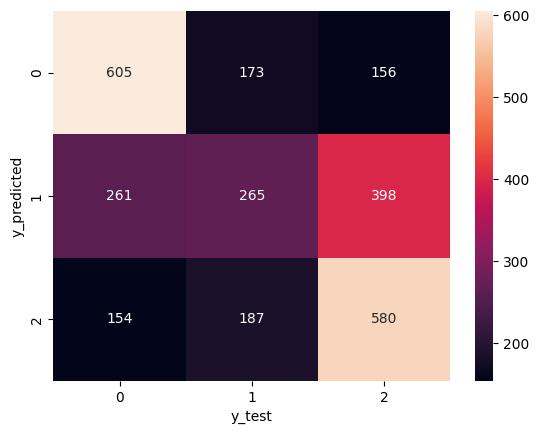

In [ ]:
# Evaluated the model's performance

print(classification_report(y_test, y_predict))

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt='d')      # fmt stands for format and it is set to decimal
plt.xlabel('y_test')
plt.ylabel('y_predicted')

At this stage, the quality metrics indicated a poor to average model performance, with an overall accuracy of 0.52.
Notably, the non-diabetic (0) and diabetic (2) classes appeared to dominate or influence the model more (refer to recall and f1 scores.)

## FEATURE AND MODEL SELECTION

### RE-SAMPLED DATASET: A

### Recursive feature elimination with cross validation using a random forest model (Dataset A)
A random forest model was considered because it can potentailly offer more robust predictions.

Random forest models are based on the ensemble learning method and combine multiple decision trees for a more accurate prediction.
The decision trees are trained independently on subsets of the data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Created an instance of the random forest model using standard or default parameters

rfmodel = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Created a new instance of the recursive feature selector

rfecvRF = RFECV(estimator = rfmodel, step=1, cv=5, scoring="accuracy", n_jobs=-1)


As discussed previously, some algorithms, like decision trees or random forests, are less sensitive to feature scaling. Trees split on the values of features directly and are therefore invariant to the scale or distribution of the feature values. The unscaled training and testing X-data was therefore used.

In [ ]:
# Trained the RFECV object: Fitted the training data i.e. applied the feature selector object to the training data set.

rfecvRF = rfecvRF.fit(X_train, y_train)

In [ ]:
# Checked the optimal number of features identified.

optimal_num = rfecvRF.n_features_
Best_features = features[rfecvRF.support_]  # indexing the columns by those in the trained rfecv object only

# Features refers to the list of columns (features)from X. Created at time of original split.
print (optimal_num)
print (Best_features)

20
Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')


In [ ]:
# Tested the trained RFECV object i.e. made predictions using the re-sampled scaled X test data set

y_predictRF = rfecvRF.predict(X_test)

              precision    recall  f1-score   support

           0       0.59      0.58      0.59       934
           1       0.38      0.34      0.36       924
           2       0.49      0.55      0.52       921

    accuracy                           0.49      2779
   macro avg       0.49      0.49      0.49      2779
weighted avg       0.49      0.49      0.49      2779



Text(50.722222222222214, 0.5, 'y_predicted')

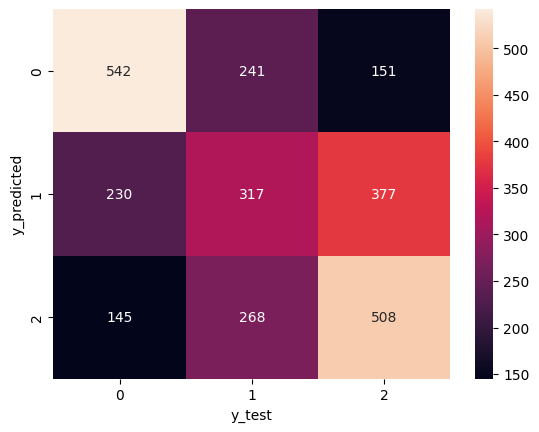

In [ ]:
# Evaluated the model's performance

print(classification_report(y_test, y_predictRF))

cm = confusion_matrix(y_test, y_predictRF)
sns.heatmap(cm, annot=True, fmt='d')      # fmt stands for format and it is set to decimal
plt.xlabel('y_test')
plt.ylabel('y_predicted')

Incorporation of an ensemble learning-method (random forest model) did not improve the performance.


## FEATURE AND MODEL SELECTION

### RE-SAMPLED DATASET: A

### Recursive feature elimination with cross validation using a gradient boosting model, XGBoost (Dataset A)
Gradient Boosting: This specific technique within ensemble learning involves training models sequentially. Each new model tries to improve upon the predictions of the previous model by focusing on areas where it made mistakes.

XGBoost utilizes a particularly efficient gradient boosting algorithm that optimizes the model training process. It iteratively builds decision trees, with each new tree focusing on correcting the errors made by the previous ones.

In [ ]:
# Loaded the required library

import xgboost as xgb

In [ ]:
# Created an instance of the xgb classifier

xgbclf = xgb.XGBClassifier(random_state=42)

In [ ]:
# Created an instance of the recursive feature selector

rfecvXG = RFECV(estimator = xgbclf, step=1, cv=5, scoring="accuracy", n_jobs=-1)

XGBoost is based on decision trees. Trees split on the values of features directly and are therefore invariant to the scale or distribution of the feature values. The unscaled training and testing X-data was therefore used.

In [ ]:
# Trained the RFECV object: Fitted the training data i.e. applied the feature selector object to the training data set.

rfecvXG = rfecvXG.fit(X_train, y_train)

In [ ]:
# Checked the optimal number of features identified.

optimal_num = rfecvXG.n_features_
Best_features = features[rfecvXG.support_]  # indexing the columns by those in the trained rfecv object only
# Features refers to the list of columns from X. Created at time of original split

print (optimal_num)
print (Best_features)

12
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke',
       'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Age', 'Income'],
      dtype='object')


In [ ]:
# Tested the trained RFECV object i.e. made predictions using the re-sampled scaled x test data set

y_predictXG = rfecvXG.predict(X_test)

              precision    recall  f1-score   support

           0       0.59      0.59      0.59       934
           1       0.40      0.33      0.36       924
           2       0.50      0.58      0.54       921

    accuracy                           0.50      2779
   macro avg       0.50      0.50      0.50      2779
weighted avg       0.50      0.50      0.50      2779



Text(50.722222222222214, 0.5, 'y_predicted')

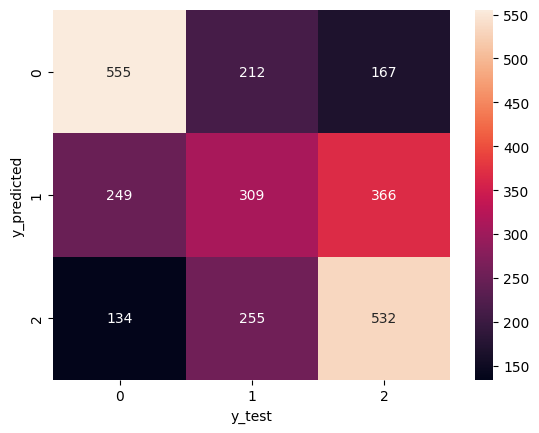

In [ ]:
# Evaluated the model's performance

print(classification_report(y_test, y_predictXG))

cm = confusion_matrix(y_test, y_predictXG)
sns.heatmap(cm, annot=True, fmt='d')      # fmt stands for format and it is set to decimal
plt.xlabel('y_test')
plt.ylabel('y_predicted')

Even with a more sophisticated ensemble learning model, there was no improvement in the predictive model performance as accuracy remained at 0.50.

One factor to take into consideration is that the process of re-sampling while seeking to maintain the three original classes may have resulted in excessive / critical undersampling of the majority classes.

## FEATURE AND MODEL SELECTION

### RE-SAMPLED DATASET: B

Original count: class 0 = 213703, class 1 = 4631, class 2 = 35346

Final count (after re-classification and random undersampling): class 0 = 39977, class 1 = 39977

### Recursive feature elimination with cross validation using a logistic regression model (Dataset B)

In [ ]:
# Created an instance of the Logistic regression model

logmodel2 = LogisticRegression(solver='lbfgs', max_iter=300, random_state=42) #default max_iter=200 did not allow for convergance

In [ ]:
# Created an instance of the recursive feature elimination with cross validation model

rfecv2 =  RFECV(estimator = logmodel2, step=1, cv=5, scoring="accuracy", n_jobs=-1)

In [ ]:
# The re-sampled data was split into training and testing data; X_resampled2 and y_resampled2 are associated with dataset B

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled2, y_resampled2, test_size=0.2, random_state=42)

**Scaling of the continuous X data**

Necessary to handle the difference in scale of the variables. This aids model optimization.

In [ ]:
# Created an instance of the caler
scaler2 = MinMaxScaler()

X_train_scaled2 = X_train2.copy()
X_test_scaled2 = X_test2.copy()

# Fitted and transformed the training X data i.e. scaled / standardized the training X data
X_train_scaled2[['BMI', 'MentHlth', 'PhysHlth']] = scaler2.fit_transform(X_train2[['BMI', 'MentHlth', 'PhysHlth']])

# Transformed the test X data using the fitted scaler
X_test_scaled2[['BMI', 'MentHlth', 'PhysHlth']] = scaler2.transform(X_test2[['BMI', 'MentHlth', 'PhysHlth']])


In [ ]:
# Trained the feature selection on=bject with the re-sampled, scaled training data

rfecv2 = rfecv2.fit(X_train_scaled2, y_train2)

In [ ]:
# Checked the optimal number of features identified.

optimal_num = rfecv2.n_features_
Best_features = features[rfecv2.support_]  # indexing the columns by those in the trained rfecv object only
# Features refers to the list of columns from X. Created at time of original split

print (optimal_num)
print (Best_features)

16
Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke',
       'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [ ]:
# Tested the trained RFECV object i.e. made predictions using the re-sampled scaled X test data set

y_predict2 = rfecv2.predict(X_test_scaled2)

              precision    recall  f1-score   support

           0       0.75      0.72      0.74      8027
           1       0.73      0.76      0.74      7964

    accuracy                           0.74     15991
   macro avg       0.74      0.74      0.74     15991
weighted avg       0.74      0.74      0.74     15991



Text(50.722222222222214, 0.5, 'y_predicted')

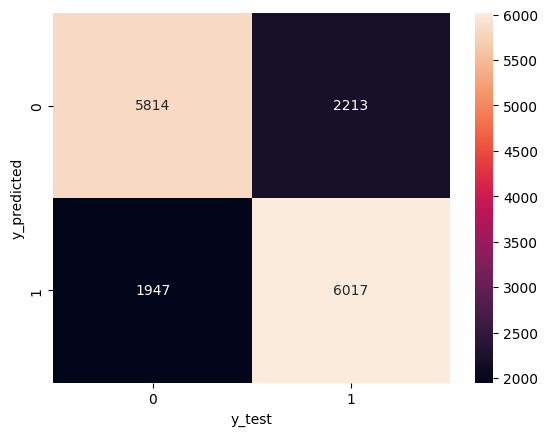

In [ ]:
# Evaluated the model's performance

print(classification_report(y_test2, y_predict2))

cm1 = confusion_matrix(y_test2, y_predict2)
sns.heatmap(cm1, annot=True, fmt='d')      # fmt stands for format and it is set to decimal
plt.xlabel('y_test')
plt.ylabel('y_predicted')

The decision to move to a binary dataset and thereby reduce the extent of random undersampling required to address the class imbalance, was shown to be beneficial. Accuracy was reported at 0.75 and was a balanced representation of both diabetes health status classes.

This then presented an opportunity to consider hyperparameter tuning.

## HYPERPARAMETER TUNING
## Regularization (C) and solver algorithms for optimization

**Regularization** is a technique used in machine learning to prevent overfitting, which happens when a model performs well on training data but poorly on new, unseen data. Overfitting occurs when a model learns not only the underlying patterns in the data but also the noise and outliers.
- A large C value equates to a a low regularization strength, which means the model has more flexibility to fit the training data, potentially leading to overfitting.
- A small C value equates to high regularization strength. This penalizes complex models more, encouraging simpler models that may generalize better to new data.


**Solvers** are algorithms that adjust the coefficients of the logistic regression model to find the best fit for the data. Different solvers can perform better or worse depending on the dataset size and regularization type.

**Grid search with cross validation** was used to allow trying of different combinations of hyperparameters to find the best combination for model performance.

In [ ]:
# Adjusted the scaled X training and testing data (dataset B) to reflect the best features identified

X_train_scaled_best = X_train_scaled2[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump',
                                  'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]

X_test_scaled_best = X_test_scaled2[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump',
                                  'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Defined the parameter grid for the hyperparameters to evaluate
param_grid = {'solver': ['newton-cg', 'lbfgs', 'sag'],  # most common solvers for large datasets
              'max_iter':[200, 300, 400, 500],
              'C': [0.01, 0.1, 1, 10, 100]}    #typical range for regularization strengths

# Created an instance of GridSearchCV
grid_search = GridSearchCV(estimator=logmodel2, param_grid=param_grid, cv=5, scoring='accuracy') # logmodel2 maintained

# Fitted the grid search to the training data ('best features')
grid_search.fit(X_train_scaled_best, y_train2)

print(f'Best parameters: {grid_search.best_params_}') # best_params_ is an attribute ot the grid_search object
print(f'Best cross-validation score: {grid_search.best_score_}') # # best_score_ is an attribute ot the grid_search object

Best parameters: {'C': 10, 'max_iter': 200, 'solver': 'sag'}
Best cross-validation score: 0.7432735100745713


              precision    recall  f1-score   support

           0       0.75      0.73      0.74      8027
           1       0.73      0.75      0.74      7964

    accuracy                           0.74     15991
   macro avg       0.74      0.74      0.74     15991
weighted avg       0.74      0.74      0.74     15991



Text(50.722222222222214, 0.5, 'y_predicted')

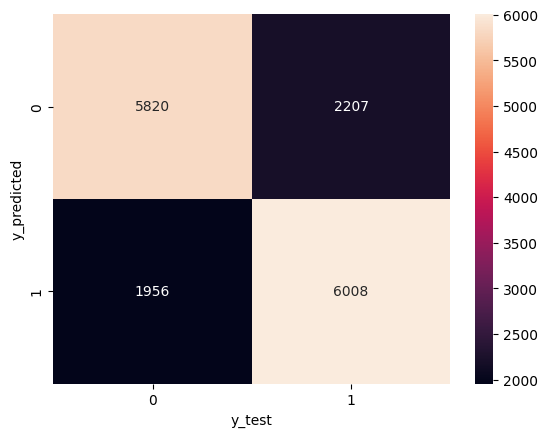

In [ ]:
# Application and testing of best parameters and evaluation of the performance

# Created an instance of the LogisticRegression model with the 'best parameters'
logmodel3 = LogisticRegression(solver='sag', max_iter=400, C=100, random_state=42)

# Trained the model with the same scaled training data (best features) i.e. Fitted the model on the scaled training data
logmodel3.fit(X_train_scaled_best, y_train2)

# Predicted the test set results
y_predict3 = logmodel3.predict(X_test_scaled_best)

# Generated quality measures
print(classification_report(y_test2, y_predict3))

cm2 = confusion_matrix(y_test2, y_predict3)
sns.heatmap(cm2, annot=True, fmt='d')      # fmt stands for format and it is set to decimal
plt.xlabel('y_test')
plt.ylabel('y_predicted')

There was no notable improvement in model performance with the hyperparameter tuning.

The use of emsemble learning models such as random forests and gradient boosting machines did not improve performance when working with version "A" of this dataset and therefore it was anticipated that no further improvement would be achieved by considering those models here.

In [ ]:
# Retrieval of model co-efficients and intercept for building of a formula representing the logistic regression model

coefficients = logmodel3.coef_[0]      # Extraction of the coefficients of the model using the coef_ attribute
intercept = logmodel3.intercept_[0]    # Extraction of the intercept of the model using the intercept_ attribute

# Print coefficients and intercept
print("Model coefficients:", coefficients)
print(" ")
print("Intercept:", intercept)
print(" ")

# Create a formula for the logistic regression model
features = X_train_scaled_best.columns     # identification of the best features identified and used
formula = f'log_odds = {intercept:.4f} + '      # definition of the base formula structure
formula += " + ".join(f'{coef:.4f}*{feat}' for coef, feat in zip(coefficients, features))   # use of zip to iterate over the coefficients and features lists together
print("Logistic Regression formula:\n", formula)


Model coefficients: [ 0.69859805  0.57242781  1.31884351  6.62451121  0.17269666  0.22394965
 -0.63670167  0.05890317  0.54642078 -0.07747214 -0.1869174   0.06530508
  0.24998176  0.14875458 -0.04751266 -0.06777161]
 
Intercept: -5.673398823595133
 
Logistic Regression formula:
 log_odds = -5.6734 + 0.6986*HighBP + 0.5724*HighChol + 1.3188*CholCheck + 6.6245*BMI + 0.1727*Stroke + 0.2239*HeartDiseaseorAttack + -0.6367*HvyAlcoholConsump + 0.0589*NoDocbcCost + 0.5464*GenHlth + -0.0775*MentHlth + -0.1869*PhysHlth + 0.0653*DiffWalk + 0.2500*Sex + 0.1488*Age + -0.0475*Education + -0.0678*Income


## CONCLUSIONS
This exercise demonstrated the potential for using predicitve modeling in healthcare planning for better future outcomes. Understanding which factors can indicate the likelihood of developing diabetes or any other disease, empowers individuals to act rather than respond.

Of the 21 features or potential predictor variables considered, an **optimised logistic regression model** was created using 16 of them.
- (i) blood pressure (HighBP), (ii) cholesterol level (HighChol), (iii) when cholesterol levels were last checked (CholCheck), (iv) BMI, (v) Stroke, (vi) Heart disease or attack, (vii) alcohol consumption 'HvyAlcoholConsump', (viii) no doctor because of cost (NoDocbcCost) (ix) general health (GenHlth), (x) mental health (MenHlth) (xi) physical health (PhysHlth), (xii) difficulty walking (DiffWalk), (xiii) Sex, (xiv) Age, (xv) education, and (xvi) income.
- **Recursive feature elimination with cross validation** was the feature selection technique of choice.
- Ensemble learning models such as random forests and gradient boosting machines were considered but the added complexity did not improve quality measures such as accuracy.
- Hyperparameter tuning focused on: **regularization strength**, **solver algorithms** and **maximun iteratons**. A grid search apporach was used to find the best combinatation of parameters.

**Next steps?**

With an accuracy of 74%, this model performed very well. Both classes have similar performance metrics with precision, recall, and F1-score around 0.73 to 0.75. The macro and weighted averages are also similar, indicating that the performance is fairly balanced across the classes. However, there is still room for improvement to achieve a greater level of accuracy and confidence in the predictions.
- Consideration of more computaionally expensive and complex models such as neural networks.
- Identification of additional demographic and social indicators.
- Expansion of the size of the surveyed population. Such would elevate the distribution of all diabetes classes and help address the downside of **random undersampling** which was the technique adopted to handle **class imbalance**.
<br>

[Link to current iteration of the Diabetes Predictor app.](https://predictivemodeling-app.streamlit.app/)

### References
- [Diabetes Health Indicators Datasets](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)
- [Building Risk Prediction Models for Type 2 Diabetes Using Machine Learning Techniques](https://www.cdc.gov/pcd/issues/2019/19_0109.htm)
- [Barbados is in the grip of a diabetic foot amputation crisis](https://www.bmj.com/content/385/bmj.q350.full)
